### Imports

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

#pd.set_option('display.max_columns', None)
#plt.style.use('ggplot')

### Upload

##### fire data (non related data- just in case we need fire data) from : https://www.fema.gov/about/openfema/data-sets/fema-usfa-nfirs-annual-data

In [18]:
#df2019 = pd.read_csv('data/usfa/usfa_nfirs_2019/arson.txt', sep='^')

In [19]:
#df2019

In [20]:
#df2019basicincident = pd.read_csv('data/usfa/usfa_nfirs_2019/basicincident.txt', sep='^')

In [21]:
#df2019codelookup = pd.read_csv('data/usfa/usfa_nfirs_2019/codelookup.txt', sep='^')

In [22]:
#df2019codelookup

In [23]:
#fire-loss-est = pd.read_excel('data/data/residential-nonresidential-fire-loss-estimates.xlsx')

#### Data from: https://hazards.fema.gov/nri/data-resources#csvDownload

In [24]:
df_nri_counties = pd.read_csv('../data/NRI/NRI_Table_Counties.csv')

In [25]:
df_nri_data_dic = pd.read_csv('../data/NRI/NRIDataDictionary.csv')

In [26]:
df_nri_hazard_info = pd.read_csv('../data/NRI/NRI_HazardInfo.csv')

In [27]:
#pd.set_option("display.max_rows", max_rows, "display.max_columns", max_cols)

#### Hazard type (17 hazard types)

In [28]:
df_nri_hazard_info 

OID_             Hazard Prefix           Service      Start    End_  \
0      1          Avalanche   AVLN         Avalanche       1960  2019.0   
1      2   Coastal Flooding   CFLD   CoastalFlooding        NaN     NaN   
2      3          Cold Wave   CWAV          ColdWave       2005  2017.0   
3      4            Drought   DRGT           Drought       2000  2017.0   
4      5         Earthquake   ERQK        Earthquake       2017  2017.0   
5      6               Hail   HAIL              Hail       1986  2017.0   
6      7          Heat Wave   HWAV          HeatWave       2005  2017.0   
7      8          Hurricane   HRCN         Hurricane  1851/1949  2017.0   
8      9          Ice Storm   ISTM          IceStorm       1946  2014.0   
9     10          Landslide   LNDS         Landslide       2010  2019.0   
10    11          Lightning   LTNG         Lightning       1991  2012.0   
11    12  Riverine Flooding   RFLD  RiverineFlooding       1996  2019.0   
12    13        Strong Wind   SWND        StrongWind       1986  2017.0   
13    14            Tornado   TRND           Tornado       1986  2019.0   
14    15            Tsunami   TSUN           Tsunami       1800  2018.0   
15    16  Volcanic Activity   VLCN  VolcanicActivity     9310BC  2018.0   
16    17           Wildfire   WFIR          Wildfire       2016  2016.0   
17    18     Winter Weather   WNTW     WinterWeather       2005  2017.0   

   TotalYears        FrequencyModel  EAL_Building  EAL_Population  \
0          60  Annualized Frequency             1               1   
1         NaN  Annualized Frequency             1               1   
2          12  Annualized Frequency             1               1   
3          18  Annualized Frequency             0               0   
4           1           Probability             1               1   
5          32  Annualized Frequency             1               1   
6          12  Annualized Frequency             1               1   
7      167/69  Annualized Frequency             1               1   
8          67  Annualized Frequency             1               1   
9          10  Annualized Frequency             1               1   
10         22  Annualized Frequency             1               1   
11         24  Annualized Frequency             1               1   
12         32  Annualized Frequency             1               1   
13         34  Annualized Frequency             1               1   
14        219  Annualized Frequency             1               1   
15      11328  Annualized Frequency             1               1   
16          1           Probability             1               1   
17         12  Annualized Frequency             1               1   

    EAL_Agriculture                                     PeriodOfRecord  \
0                 0                               1960-2019 (60 years)   
1                 0                        Various (see documentation)   
2                 1                               2005-2017 (12 years)   
3                 1                               2000-2017 (18 years)   
4                 0                                       2017 dataset   
5                 1                               1986-2017 (32 years)   
6                 1                               2005-2017 (12 years)   
7                 1  East 1851-2017 (167 years) / West 1949-2017 (6...   
8                 0                               1946-2014 (67 years)   
9                 0                               2010-2019 (10 years)   
10                0                               1991-2012 (22 years)   
11                1                               1996-2019 (24 years)   
12                1                               1986-2017 (32 years)   
13                1                               1986-2019 (34 years)   
14                0                              1800-2018 (219 years)   
15                0                          9310BC-2018 (11328 years)   
16      

#### Data dictionary (column name descriptions) 

In [29]:
df_nri_data_dic

Sort    Field Name                                        Field Alias  \
0       1      OBJECTID                                           OBJECTID   
1       2         Shape                                              Shape   
2       3  Shape_Length                                       Shape_Length   
3       4    Shape_Area                                         Shape_Area   
4       5         STATE                                         State Name   
..    ...           ...                                                ...   
374   375     JURS_AREA  FEMA Mitigation Planning Jurisdiction Layer - ...   
375   376     JURS_TYPE  FEMA Mitigation Planning Jurisdiction Layer - ...   
376   377    HIFLD_NAME  Homeland Infrastructure Foundation-Level Data ...   
377   378    HIFLD_AREA  Homeland Infrastructure Foundation-Level Data ...   
378   379    HIFLD_TYPE  Homeland Infrastructure Foundation-Level Data ...   

         Type  Length Relevant Layer Metric Type    Version  
0     Integer     4.0            NaN         NaN  July 2021  
1    Geometry     NaN            NaN         NaN  July 2021  
2      Double     8.0            NaN         NaN  July 2021  
3      Double     8.0            NaN         NaN  July 2021  
4      String   250.0            All         NaN  July 2021  
..        ...     ...            ...         ...        ...  
374    String   254.0            All         NaN  July 2021  
375    String   254.0            All         NaN  July 2021  
376    String   100.0            All         NaN  July 2021  
377    String   800.0            All         NaN  July 2021  
378    String   100.0            All         NaN  July 2021  

[379 rows x 8 columns]

In [30]:
df_nri_counties

OID_  NRI_ID     STATE STATEABBRV  STATEFIPS      COUNTY COUNTYTYPE  \
0        1  C21115  Kentucky         KY         21     Johnson     County   
1        2  C21117  Kentucky         KY         21      Kenton     County   
2        3  C21119  Kentucky         KY         21       Knott     County   
3        4  C21121  Kentucky         KY         21        Knox     County   
4        5  C21123  Kentucky         KY         21       Larue     County   
...    ...     ...       ...        ...        ...         ...        ...   
3137  3138  C56037   Wyoming         WY         56  Sweetwater     County   
3138  3139  C56039   Wyoming         WY         56       Teton     County   
3139  3140  C56041   Wyoming         WY         56       Uinta     County   
3140  3141  C56043   Wyoming         WY         56    Washakie     County   
3141  3142  C56045   Wyoming         WY         56      Weston     County   

      COUNTYFIPS  STCOFIPS  POPULATION  ...     WNTW_EALB  WNTW_EALP  \
0            115     21115       23356  ...    781.792240   0.006129   
1            117     21117      159720  ...  18249.808380   0.006048   
2            119     21119       16346  ...    249.454293   0.004021   
3            121     21121       31883  ...  17055.601129   0.005838   
4            123     21123       14193  ...   9662.424572   0.000390   
...          ...       ...         ...  ...           ...        ...   
3137          37     56037       43806  ...    165.637265   0.003126   
3138          39     56039       21294  ...   2688.566845   0.001068   
3139          41     56041       21118  ...     63.272547   0.010158   
3140          43     56043        8533  ...    119.536607   0.000703   
3141          45     56045        7208  ...  11958.552736   0.003682   

        WNTW_EALPE   WNTW_EALA     WNTW_EALT  WNTW_EALS            WNTW_EALR  \
0     46577.171552    4.235939  47363.199731  19.448529  Relatively Moderate   
1     45965.118059   44.606252  64259.532691  21.530408  Relatively Moderate   
2     30560.277236    0.023091  30809.754620  16.851393       Relatively Low   
3     44371.625150    0.082573  61427.308851  21.209328  Relatively Moderate   
4      2961.292206  246.668438  12870.385216  12.597091       Relatively Low   
...            ...         ...           ...        ...                  ...   
3137  23755.525159    0.000041  23921.162465  15.488184       Relatively Low   
3138   8118.192272    0.000078  10806.759196  11.884244       Relatively Low   
3139  77199.713455   27.256486  77290.242488  22.897143  Relatively Moderate   
3140   5345.785169    1.415514   5466.737290   9.469255             Very Low   
3141  27981.258513    6.880699  39946.691949  18.375254       Relatively Low   

      WNTW_RISKS           WNTW_RISKR    NRI_VER  
0      14.131237       Relatively Low  July 2021  
1      12.470040       Relatively Low  July 2021  
2      14.466270       Relatively Low  July 2021  
3      19.585915  Relatively Moderate  July 2021  
4       7.715952             Very Low  July 2021  
...          ...                  ...        ...  
3137    5.189094             Very Low  July 2021  
3138    4.816165             Very Low  July 2021  
3139   11.296648       Relatively Low  July 2021  
3140    8.193083             Very Low  July 2021  
3141   10.777060       Relatively Low  July 2021  

[3142 rows x 365 columns]

In [31]:
df_nri_counties.info()
#365 columns and 3142 counties

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Columns: 365 entries, OID_ to NRI_VER
dtypes: float64(296), int64(5), object(64)
memory usage: 8.7+ MB


In [32]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [33]:
df_nri_counties.columns

Index(['OID_', 'NRI_ID', 'STATE', 'STATEABBRV', 'STATEFIPS', 'COUNTY',
       'COUNTYTYPE', 'COUNTYFIPS', 'STCOFIPS', 'POPULATION',
       ...
       'WNTW_EALB', 'WNTW_EALP', 'WNTW_EALPE', 'WNTW_EALA', 'WNTW_EALT',
       'WNTW_EALS', 'WNTW_EALR', 'WNTW_RISKS', 'WNTW_RISKR', 'NRI_VER'],
      dtype='object', length=365)

#### Focus on coastal flooding

In [34]:
df_coastal_flooding = df_nri_counties[['OID_', 'NRI_ID', 'STATE', 'STATEABBRV', 'STATEFIPS', 'COUNTY', 'COUNTYTYPE', 'COUNTYFIPS', 'STCOFIPS', 'POPULATION', 'BUILDVALUE', 'AGRIVALUE','CFLD_EVNTS', 'CFLD_AFREQ', 'CFLD_EXPB', 'CFLD_EXPP', 'CFLD_EXPPE', 'CFLD_EXPT', 'CFLD_HLRB', 'CFLD_HLRP', 'CFLD_HLRR', 'CFLD_EALB', 'CFLD_EALP', 'CFLD_EALPE', 'CFLD_EALT', 'CFLD_EALS', 'CFLD_EALR', 'CFLD_RISKS', 'CFLD_RISKR']] 

In [35]:
df_coastal_flooding

OID_  NRI_ID                 STATE STATEABBRV  STATEFIPS  \
0        1  C21115              Kentucky         KY         21   
1        2  C21117              Kentucky         KY         21   
2        3  C21119              Kentucky         KY         21   
3        4  C21121              Kentucky         KY         21   
4        5  C21123              Kentucky         KY         21   
5        6  C21125              Kentucky         KY         21   
6        7  C21127              Kentucky         KY         21   
7        8  C21129              Kentucky         KY         21   
8        9  C21131              Kentucky         KY         21   
9       10  C21133              Kentucky         KY         21   
10      11  C21135              Kentucky         KY         21   
11      12  C21137              Kentucky         KY         21   
12      13  C21139              Kentucky         KY         21   
13      14  C21143              Kentucky         KY         21   
14      15  C21145              Kentucky         KY         21   
15      16  C21147              Kentucky         KY         21   
16      17  C21149              Kentucky         KY         21   
17      18  C21151              Kentucky         KY         21   
18      19  C21141              Kentucky         KY         21   
19      20  C21153              Kentucky         KY         21   
20      21  C21155              Kentucky         KY         21   
21      22  C21157              Kentucky         KY         21   
22      23  C21159              Kentucky         KY         21   
23      24  C21161              Kentucky         KY         21   
24      25  C21163              Kentucky         KY         21   
25      26  C21165              Kentucky         KY         21   
26      27  C21167              Kentucky         KY         21   
27      28  C21169              Kentucky         KY         21   
28      29  C21171              Kentucky         KY         21   
29      30  C21173              Kentucky         KY         21   
30      31  C21175              Kentucky         KY         21   
31      32  C21177              Kentucky         KY         21   
32      33  C21179              Kentucky         KY         21   
33      34  C21181              Kentucky         KY         21   
34      35  C21183              Kentucky         KY         21   
35      36  C21185              Kentucky         KY         21   
36      37  C21187              Kentucky         KY         21   
37      38  C21189              Kentucky         KY         21   
38      39  C21191              Kentucky         KY         21   
39      40  C21193              Kentucky         KY         21   
40      41  C21195              Kentucky         KY         21   
41      42  C21197              Kentucky         KY         21   
42      43  C21199              Kentucky         KY         21   
43      44  C21201              Kentucky         KY         21   
44      45  C21203              Kentucky         KY         21   
45      46  C21205              Kentucky         KY         21   
46      47  C21207              Kentucky         KY         21   
47      48  C21209              Kentucky         KY         21   
48      49  C21211              Kentucky         KY         21   
49      50  C21213              Kentucky         KY         21   
50      51  C21215              Kentucky         KY         21   
51      52  C21217              Kentucky         KY         21   
52      53  C21219              Kentucky         KY         21   
53      54  C21221              Kentucky         KY         21   
54      55  C21223              Kentucky         KY         21   
55      56  C21225              Kentucky         KY         21   
56      57  C21227              Kentucky         KY         21   
57      58  C21229              Kentucky         KY         21   
58      59  C21231              Kentucky         KY         21   
59      60  C21233              Kentucky      

In [36]:
df_coastal_flooding[df_coastal_flooding['CFLD_EVNTS'].notnull()]

Empty DataFrame
Columns: [OID_, NRI_ID, STATE, STATEABBRV, STATEFIPS, COUNTY, COUNTYTYPE, COUNTYFIPS, STCOFIPS, POPULATION, BUILDVALUE, AGRIVALUE, CFLD_EVNTS, CFLD_AFREQ, CFLD_EXPB, CFLD_EXPP, CFLD_EXPPE, CFLD_EXPT, CFLD_HLRB, CFLD_HLRP, CFLD_HLRR, CFLD_EALB, CFLD_EALP, CFLD_EALPE, CFLD_EALT, CFLD_EALS, CFLD_EALR, CFLD_RISKS, CFLD_RISKR]
Index: []

In [37]:
df_coastal_flooding_notnull = df_coastal_flooding[df_coastal_flooding['CFLD_AFREQ'].notnull()]

In [38]:
df_coastal_flooding_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 488 entries, 63 to 3106
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OID_        488 non-null    int64  
 1   NRI_ID      488 non-null    object 
 2   STATE       488 non-null    object 
 3   STATEABBRV  488 non-null    object 
 4   STATEFIPS   488 non-null    int64  
 5   COUNTY      488 non-null    object 
 6   COUNTYTYPE  487 non-null    object 
 7   COUNTYFIPS  488 non-null    int64  
 8   STCOFIPS    488 non-null    int64  
 9   POPULATION  488 non-null    int64  
 10  BUILDVALUE  488 non-null    float64
 11  AGRIVALUE   488 non-null    float64
 12  CFLD_EVNTS  0 non-null      float64
 13  CFLD_AFREQ  488 non-null    float64
 14  CFLD_EXPB   488 non-null    float64
 15  CFLD_EXPP   488 non-null    float64
 16  CFLD_EXPPE  488 non-null    float64
 17  CFLD_EXPT   488 non-null    float64
 18  CFLD_HLRB   488 non-null    float64
 19  CFLD_HLRP   488 non-null   

In [39]:
df_coastal_flooding_notnull.columns


Index(['OID_', 'NRI_ID', 'STATE', 'STATEABBRV', 'STATEFIPS', 'COUNTY',
       'COUNTYTYPE', 'COUNTYFIPS', 'STCOFIPS', 'POPULATION', 'BUILDVALUE',
       'AGRIVALUE', 'CFLD_EVNTS', 'CFLD_AFREQ', 'CFLD_EXPB', 'CFLD_EXPP',
       'CFLD_EXPPE', 'CFLD_EXPT', 'CFLD_HLRB', 'CFLD_HLRP', 'CFLD_HLRR',
       'CFLD_EALB', 'CFLD_EALP', 'CFLD_EALPE', 'CFLD_EALT', 'CFLD_EALS',
       'CFLD_EALR', 'CFLD_RISKS', 'CFLD_RISKR'],
      dtype='object')

In [40]:
df_coastal_flooding_notnull

OID_  NRI_ID                 STATE STATEABBRV  STATEFIPS  \
63      64  C22001             Louisiana         LA         22   
64      65  C22003             Louisiana         LA         22   
65      66  C22005             Louisiana         LA         22   
66      67  C22007             Louisiana         LA         22   
67      68  C22009             Louisiana         LA         22   
68      69  C22011             Louisiana         LA         22   
72      73  C22019             Louisiana         LA         22   
74      75  C22023             Louisiana         LA         22   
77      78  C22029             Louisiana         LA         22   
79      80  C22033             Louisiana         LA         22   
81      82  C22037             Louisiana         LA         22   
82      83  C22039             Louisiana         LA         22   
85      86  C22045             Louisiana         LA         22   
86      87  C22047             Louisiana         LA         22   
88      89  C22051             Louisiana         LA         22   
89      90  C22053             Louisiana         LA         22   
90      91  C22055             Louisiana         LA         22   
91      92  C22057             Louisiana         LA         22   
94      95  C22063             Louisiana         LA         22   
98      99  C22071             Louisiana         LA         22   
100    101  C22075             Louisiana         LA         22   
101    102  C22077             Louisiana         LA         22   
106    107  C22087             Louisiana         LA         22   
107    108  C22089             Louisiana         LA         22   
109    110  C22093             Louisiana         LA         22   
110    111  C22095             Louisiana         LA         22   
111    112  C22097             Louisiana         LA         22   
112    113  C22099             Louisiana         LA         22   
113    114  C22101             Louisiana         LA         22   
114    115  C22103             Louisiana         LA         22   
115    116  C22105             Louisiana         LA         22   
117    118  C22109             Louisiana         LA         22   
119    120  C22113             Louisiana         LA         22   
123    124  C22121             Louisiana         LA         22   
125    126  C22125             Louisiana         LA         22   
127    128  C23001                 Maine         ME         23   
129    130  C23005                 Maine         ME         23   
131    132  C23009                 Maine         ME         23   
132    133  C23011                 Maine         ME         23   
133    134  C23013                 Maine         ME         23   
134    135  C23015                 Maine         ME         23   
136    137  C23019                 Maine         ME         23   
138    139  C23023                 Maine         ME         23   
140    141  C23027                 Maine         ME         23   
141    142  C23029                 Maine         ME         23   
142    143  C23031                 Maine         ME         23   
144    145  C24003              Maryland         MD         24   
145    146  C24005              Maryland         MD         24   
146    147  C24009              Maryland         MD         24   
147    148  C24011              Maryland         MD         24   
149    150  C24015              Maryland         MD         24   
150    151  C24017              Maryland         MD         24   
151    152  C24019              Maryland         MD         24   
154    155  C24025              Maryland         MD         24   
155    156  C24027              Maryland         MD         24   
156    157  C24029              Maryland         MD         24   
157    158  C24031              Maryland         MD         24   
158    159  C24033              Maryland         MD         24   
159    160  C24035              Maryland         MD         24   
160    161  C24037              Maryland      

In [41]:
df_coastal_flooding_notnull_states = df_coastal_flooding_notnull.groupby(['STATEABBRV'])["STATEABBRV", 'CFLD_EVNTS', 'CFLD_AFREQ', 'CFLD_EXPB', 'CFLD_EXPP',
       'CFLD_EXPPE', 'CFLD_EXPT', 'CFLD_HLRB', 'CFLD_HLRP', 'CFLD_HLRR',
       'CFLD_EALB', 'CFLD_EALP', 'CFLD_EALPE', 'CFLD_EALT', 'CFLD_EALS',
       'CFLD_EALR', 'CFLD_RISKS', 'CFLD_RISKR'].sum().sort_values('CFLD_RISKS', ascending=False)

<ipython-input-41-08f9caadbdda>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_coastal_flooding_notnull_states = df_coastal_flooding_notnull.groupby(['STATEABBRV'])["STATEABBRV", 'CFLD_EVNTS', 'CFLD_AFREQ', 'CFLD_EXPB', 'CFLD_EXPP',


In [42]:
df_coastal_flooding_notnull_states

CFLD_EVNTS  CFLD_AFREQ     CFLD_EXPB     CFLD_EXPP    CFLD_EXPPE  \
STATEABBRV                                                                     
FL                 0.0  113.928464  9.284451e+11  7.240573e+06  5.502835e+13   
WA                 0.0   81.124000  1.117531e+10  1.002358e+05  7.617922e+11   
NJ                 0.0   75.512488  2.277733e+11  1.562398e+06  1.187423e+13   
LA                 0.0  129.262242  2.453752e+11  2.255487e+06  1.714170e+13   
VA                 0.0  173.559845  1.406231e+11  1.155678e+06  8.783156e+12   
TX                 0.0   86.307267  2.044937e+11  1.925770e+06  1.463585e+13   
NC                 0.0   86.635277  7.597675e+10  5.711411e+05  4.340673e+12   
NY                 0.0   70.994806  4.414278e+11  3.537749e+06  2.688689e+13   
MD                 0.0   84.288695  4.756999e+10  2.890164e+05  2.196525e+12   
OR                 0.0   45.080000  9.362516e+09  5.993359e+04  4.554953e+11   
SC                 0.0   37.836275  1.069242e+11  7.708164e+05  5.858205e+12   
GA                 0.0   32.311262  4.930169e+10  4.351940e+05  3.307475e+12   
PA                 0.0   22.103809  2.490806e+10  1.898526e+05  1.442880e+12   
ME                 0.0   48.749316  1.067059e+10  6.788876e+04  5.159546e+11   
MA                 0.0   40.236567  1.377131e+11  8.780366e+05  6.673078e+12   
DE                 0.0   13.331745  2.413661e+10  1.406252e+05  1.068752e+12   
CA                 0.0   31.730000  3.716507e+11  3.845537e+06  2.922608e+13   
MS                 0.0   10.054631  3.057112e+10  2.681691e+05  2.038085e+12   
CT                 0.0   22.289363  5.179946e+10  3.408682e+05  2.590598e+12   
RI                 0.0   22.371172  1.835917e+10  1.243937e+05  9.453923e+11   
AL                 0.0   10.032663  1.513261e+10  1.010259e+05  7.677965e+11   
AK                 0.0    0.062000  3.671448e+08  2.512833e+03  1.909753e+10   
HI                 0.0    0.347855  2.389216e+10  1.611599e+05  1.224815e+12   
NH                 0.0    8.873841  3.014323e+09  1.877096e+04  1.426593e+11   
UT                 0.0    0.024000  4.152179e+09  3.798429e+04  2.886806e+11   
D.C.               0.0    4.425936  4.589549e+09  2.459308e+04  1.869074e+11   
MN                 0.0    0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
OH                 0.0    0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
MI                 0.0    0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
IN                 0.0    0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
IL                 0.0    0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
WI                 0.0    0.000000  0.000000e+00  0.000000e+00  0.000000e+00   

               CFLD_EXPT     CFLD_HLRB     CFLD_HLRP     CFLD_EALB  CFLD_EALP  \
STATEABBRV                                                                      
FL          5.595680e+13  1.604822e-03  1.121476e-04  3.129041e+07  16.550223   
WA          7.729675e+11  5.697609e-02  1.869207e-03  1.029795e+08  23.308199   
NJ          1.210200e+13  4.859183e-03  7.510070e-07  4.847332e+08   0.421822   
LA          1.738708e+13  6.130006e-04  7.666751e-05  5.825063e+06   7.624203   
VA          8.923779e+12  1.938578e-02  2.633171e-06  2.408846e+07   0.091481   
TX          1.484035e+13  8.612371e-04  7.617967e-06  8.011222e+06   1.631720   
NC          4.416649e+12  8.036294e-04  3.570191e-05  3.715880e+06   1.521513   
NY          2.732832e+13  2.512871e-02  1.006969e-05  2.503860e+07   0.462418   
MD          2.244095e+12  4.485148e-03  7.333630e-07  3.427141e+07   0.046717   
OR          4.648578e+11  3.206533e-02  3.132041e-04  3.361564e+07   4.093732   
SC          5.965129e+12  4.193460e-05  6.202044e-06  1.092772e+06   1.749060   
GA          3.356776e+12  6.113582e-06  1.613299e-05  3.852882e+04   0.761842   
PA          1.467788e+12  1.968844e-03  4.412888e-07  1.131158e+07   0.017323   
ME          5.266252e+11  8.485367e-04  3.959082e-08  1.834415e+06   0.00111

''

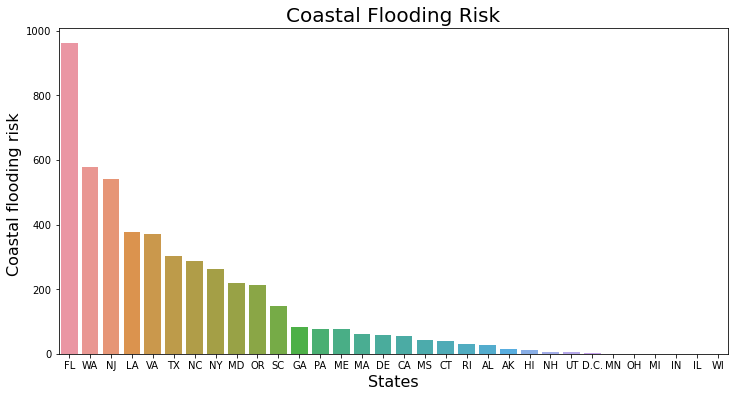

In [43]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'STATEABBRV', y = 'CFLD_RISKS', data= df_coastal_flooding_notnull_states.reset_index().sort_values('CFLD_RISKS', ascending = False))
plt.title("Coastal Flooding Risk", fontsize = 20)
plt.xlabel('States', fontsize = 16)
plt.ylabel("Coastal flooding risk ", fontsize = 16)
;

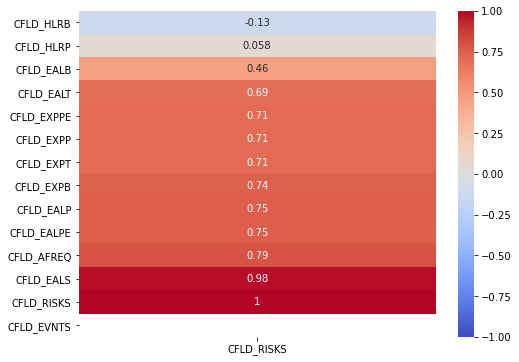

In [44]:
plt.figure(figsize=(8,6))
sns.heatmap(df_coastal_flooding_notnull_states.corr()[['CFLD_RISKS']].sort_values('CFLD_RISKS'),
            annot=True,
            cmap='coolwarm',
            vmin=-1, 
            vmax=1);